#### 해결문제


---
해결문제) 
코로나바이러스감염증-19(COVID-19) 사이트에서 시도별 발생동향 사이트에서 누적 확진환자 수를 실시간을 추출하여 그래프로 작성하시오.

+ http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=
---




## 모듈 추가
#####시각화 모듈 및 한글 처리

In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [1]:
#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 

#seaborn 라이브러리를 이용한 시각화
import seaborn as sns

#지도 시각화
#pip install folium
#https://github.com/southkorea/southkorea-maps 
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#데이터 처리 모듈
import pandas as pd
from urllib.request import urlopen
from urllib import parse
from bs4 import BeautifulSoup as bs

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 가져오기


In [4]:
#html 데이터 가져오기
url = 'http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun='

htmldata = urlopen(url).read().decode('utf-8')

In [32]:
type(htmldata)

str

In [6]:
#bs 데이터 만들기
bsdata = bs(htmldata, "html.parser")
data = bsdata.select('.data_table.midd.mgt24  tbody tr')
print(data)

[<tr class="sumline"><th scope="row">합계</th><td class="number" headers="status_level l_type1">61</td><td class="number" headers="status_level l_type2">47</td><td class="number" headers="status_level l_type3">14</td><td class="number" headers="status_con s_type1">13,612</td><td class="number" headers="status_con s_type2">925</td><td class="number" headers="status_con s_type3">12,396</td><td class="number" headers="status_con s_type4">291</td><td class="number" headers="status_con s_type5">26.25</td></tr>, <tr><th scope="row">서울</th><td class="number" headers="status_level l_type1">7</td><td class="number" headers="status_level l_type2">1</td><td class="number" headers="status_level l_type3">6</td><td class="number" headers="status_con s_type1">1,449</td><td class="number" headers="status_con s_type2">154</td><td class="number" headers="status_con s_type3">1,286</td><td class="number" headers="status_con s_type4">9</td><td class="number" headers="status_con s_type5">14.89</td></tr>, <tr>

In [7]:
#데이터 추출하여 텍스트 파일 만들기
with open('/content/drive/My Drive/PythonWork/PythonBasic/work/09/corona.csv', 'w') as fp:
    for item in data :
        row = item.select_one('th').text 
        type1 = item.select_one('[headers="status_con s_type1"]') .text.replace(',','') 
        fp.write(row + "," + type1 + '\n')

#### re모듈을 이용하여 추출


```
from ast import literal_eval

dictionary = literal_eval(string)
```



In [8]:
import re
from ast import literal_eval

In [33]:
RPSBaseData = re.search(r'RPSBaseData = ([\w\[\]\{\}\"\,: =]+)',htmldata )
RPSBaseData = RPSBaseData.group(1)
RPSBaseData

'[{"name": "서울", "count": 1449 },{"name": "부산", "count": 156 },{"name": "대구", "count": 6929 },{"name": "인천", "count": 367 },{"name": "광주", "count": 171 },{"name": "대전", "count": 164 },{"name": "울산", "count": 56 },{"name": "세종", "count": 50 },{"name": "경기", "count": 1404 },{"name": "강원", "count": 72 },{"name": "충북", "count": 71 },{"name": "충남", "count": 185 },{"name": "전북", "count": 38 },{"name": "전남", "count": 32 },{"name": "경북", "count": 1393 },{"name": "경남", "count": 149 },{"name": "제주", "count": 20 },{"name": "검역", "count": 906 }]'

In [34]:
type(RPSBaseData)

str

In [28]:
lt = literal_eval(RPSBaseData)
type(lt)

list

In [38]:
dt = {'지역':[], '확진자수':[]}
for item in lt :
    #print(item , "=>", type(item))
    for k, v in item.items() :
        #print(k , ",", v)
        if k == 'name' : dt['지역'].append(v)
        elif k == 'count' : dt['확진자수'].append(v)

dt

{'지역': ['서울',
  '부산',
  '대구',
  '인천',
  '광주',
  '대전',
  '울산',
  '세종',
  '경기',
  '강원',
  '충북',
  '충남',
  '전북',
  '전남',
  '경북',
  '경남',
  '제주',
  '검역'],
 '확진자수': [1449,
  156,
  6929,
  367,
  171,
  164,
  56,
  50,
  1404,
  72,
  71,
  185,
  38,
  32,
  1393,
  149,
  20,
  906]}

In [39]:
redf = pd.DataFrame(dt)
redf

,지역,확진자수
0,서울,1449
1,부산,156
2,대구,6929
3,인천,367
4,광주,171
5,대전,164
6,울산,56
7,세종,50
8,경기,1404
9,강원,72


## 데이터 처리하기

In [5]:
df = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/work/09/corona.csv')

In [6]:
df

,합계,13612
0,서울,1449
1,부산,156
2,대구,6929
3,인천,367
4,광주,171
5,대전,164
6,울산,56
7,세종,50
8,경기,1404
9,강원,72


In [7]:
df.columns = ['지역', '확진환자']  
df = df.set_index('지역') 
df

,확진환자
지역,
서울,1449
부산,156
대구,6929
인천,367
광주,171
대전,164
울산,56
세종,50
경기,1404


## 그래프 그리기

In [8]:
df = df.sort_values('확진환자')
df.index

Index(['제주', '전남', '전북', '세종', '울산', '충북', '강원', '경남', '부산', '대전', '광주', '충남',
       '인천', '검역', '경북', '경기', '서울', '대구'],
      dtype='object', name='지역')

In [9]:
df

,확진환자
지역,
제주,20
전남,32
전북,38
세종,50
울산,56
충북,71
강원,72
경남,149
부산,156


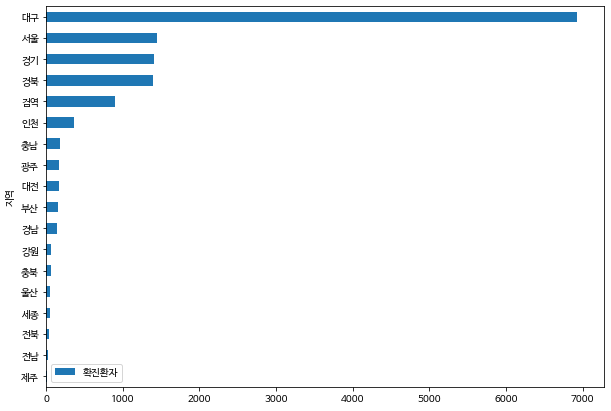

In [10]:
df.plot(kind='barh', figsize=(10,7))


In [11]:
df = df.reset_index()
df

,지역,확진환자
0,제주,20
1,전남,32
2,전북,38
3,세종,50
4,울산,56
5,충북,71
6,강원,72
7,경남,149
8,부산,156
9,대전,164


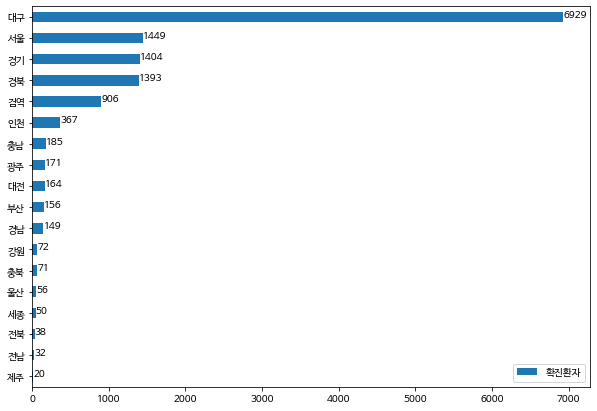

In [12]:
df.plot(kind='barh', figsize=(10,7)) 
plt.yticks(df.index, df['지역'])
for idx in df.index :
    plt.text(df.loc[idx, '확진환자'], idx, str(df.loc[idx, '확진환자']))
plt.legend(loc='lower right')
plt.show()

In [ ]:
df.head(2)

,지역,확진환자
0,제주,20
1,전남,32


In [ ]:
df.head(2)

,지역,확진환자
0,제주,20
1,전남,32


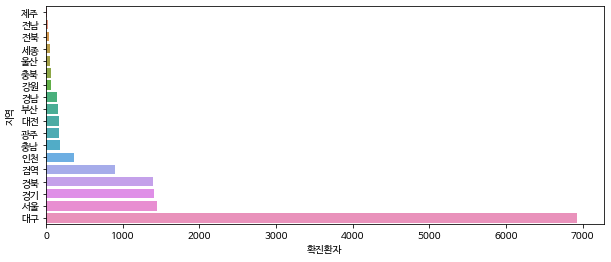

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(x="확진환자", y="지역",data=df)
plt.show()

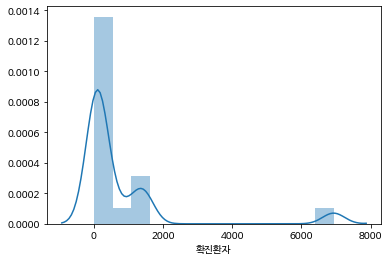

In [17]:
sns.distplot( df["확진환자"],hist=True)

## 지역 위치 정보 결합

In [ ]:
df.head(2)

,지역,확진환자
0,제주,20
1,전남,32


In [ ]:
dfarea  = pd.read_csv('/content/drive/My Drive/PythonWork/PythonBasic/work/09/코로나지역.txt', names=['지역','위도', '경도'], header=None)
dfarea.head(2) 

,지역,위도,경도
0,서울,37.568909,126.978092
1,부산,35.179960,129.074972


In [ ]:
dfarea['위도'] = dfarea['위도'].astype(float)
dfarea['경도'] = dfarea['경도'].astype(float)

In [ ]:
dfarea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      18 non-null     object 
 1   위도      18 non-null     float64
 2   경도      18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


In [ ]:
df = df.set_index('지역')
dfarea = dfarea.set_index('지역')
dfloc = pd.concat([df, dfarea], axis=1)
dfloc.head(2)

,확진환자,위도,경도
제주,20,33.489129,126.498065
전남,32,34.816410,126.462949


In [ ]:
dfloc

,확진환자,위도,경도
제주,20,33.489129,126.498065
전남,32,34.816410,126.462949
전북,38,35.821093,127.108722
세종,50,36.480219,127.289078
울산,56,35.540061,129.311434
충북,71,36.635921,127.491355
강원,72,37.885907,127.730064
경남,149,35.238483,128.692355
부산,156,35.179960,129.074972
대전,164,36.350621,127.384819


In [ ]:
dfloc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 제주 to 대구
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   확진환자    18 non-null     int64  
 1   위도      18 non-null     float64
 2   경도      18 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2+ KB


In [ ]:
dfloc['확진환자'] = dfloc['확진환자'].astype(float)

In [ ]:
map = folium.Map(location=[36, 127], zoom_start=7)
for item in dfloc.index:
    lat = dfloc.loc[item,'위도']
    long = dfloc.loc[item,'경도'] 
    memo = str( dfloc.loc[item,'확진환자'])
    folium.CircleMarker([lat,long],
                        radius=dfloc.loc[item,'확진환자']*0.005, 
                        color='blue', 
                        popup = memo,
                        fill =True
                        ).add_to(map)

map  